In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
from matplotlib.colors import ListedColormap

In [ ]:
from mono_multi.setup import FIGURES_ROOT_DIR
FIGURES_PAPER_DIR = FIGURES_ROOT_DIR / "paper-arxiv" / "schematic"

In [249]:
def point_array(arr, s=20, save_path=None):
    # Get coordinates of each cell
    x, y = np.meshgrid(np.arange(arr.shape[1]), np.arange(arr.shape[0]))

    # Flatten the arrays for scatter
    x = x.flatten()
    y = y.flatten()
    values = arr.flatten()

    # Map values to colors
    colors = ['#d01c8b' if v==0 else '#a0d75d' for v in values]
    # colors = [paired(5) if v==0 else paired(2) for v in values]  # pastel red and green hex

    plt.scatter(x, y, c=colors, s=s)  # s is the size of the circles
    plt.gca().invert_yaxis()  # optional: match array indexing
    plt.axis('equal')
    plt.axis('off')
    # plt.tight_layout()
    for ending in ['.svg', '.pdf']: 
        plt.savefig(f"{save_path}{ending}")
    plt.show()

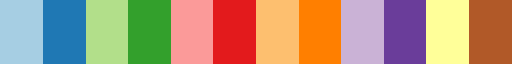

In [250]:
paired = plt.get_cmap('Paired')
colors = [paired(6), paired(2)]  # pick red and green shades
cmap = ListedColormap(colors)
paired

In [265]:
acc = 0.80
num_models, num_individuals = 5, 10
num_ones = int(num_individuals * acc)
num_zeros = num_individuals - num_ones
arr = np.array([1]*num_ones + [0]*num_zeros)

# Shuffle it randomly
np.random.shuffle(arr)
# nums = np.stack([np.random.choice([0, 1], size=(50), p=[1-acc, acc]) for num_models in range(25)])
nums = np.stack([np.random.permutation(arr) for _ in range(num_models)]).T
nums

array([[1, 1, 0, 0, 1],
       [0, 1, 1, 1, 1],
       [1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 0, 1, 1],
       [0, 1, 1, 1, 0],
       [1, 0, 1, 1, 1],
       [1, 1, 1, 0, 1],
       [1, 0, 1, 1, 1]])

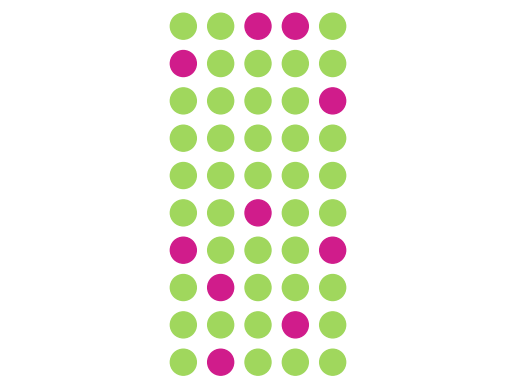

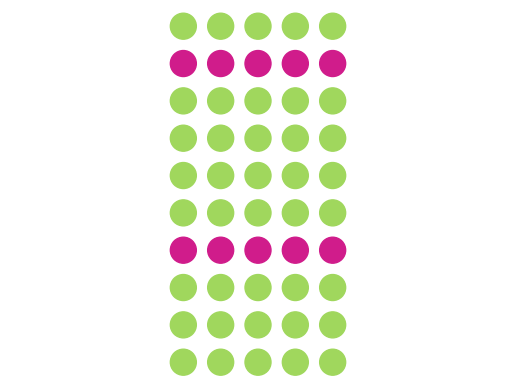

In [266]:
point_array(nums, s=350, save_path=(FIGURES_PAPER_DIR/'strong-multiplicity').as_posix())
point_array(np.stack([nums[:,0] for _ in range(num_models)]).T, s=350, save_path=(FIGURES_PAPER_DIR/'strict-monoculture').as_posix())

In [113]:
np.random.choice([0, 1], size=(10), p=[1-acc, acc])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
arr_flat = np.array([1]*num_ones + [0]*num_zeros)

# Shuffle it randomly
np.random.shuffle(arr_flat)